# Information Metrics

Run information theory metrics on time series signals.

Entropy measures explored here:
- sample entropy: XX
- permutation entropy: XX
- approximate entropy: XX
- spectral entropy: the Shannon entropy of the PSD

Notes:
- sample & approximate entroy are pretty similar, maybe don't need both (?)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import sample_entropy, perm_entropy, app_entropy, spectral_entropy

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

## Settings

In [3]:
# Simulation settings
n_seconds = 10
fs = 1000

default_exp = -1.5
default_freq = 10

# Set up the simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}
sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs,
                   'components' : {'sim_powerlaw' : {'exponent' : default_exp, 'f_range' : (1, None)},
                                   'sim_oscillation' : {'freq' : default_freq}}, 
                   'component_variances' : [1, 1]}

In [4]:
# Set the number of instances to run
n_instances = 10

# Set the range of values to simulate across
exps = np.arange(-3, 0.25, 0.25)
freqs = np.arange(5, 35, 5)
pows = np.arange(0, 2, 0.1)

In [5]:
# Settings for entropy measures
sa_params = {'order' : 2}                  # Sample Entropy
pe_params = {'order' : 3, 'delay' : 1}     # Permutation Entropy
ap_params = {'order' : 2}                  # Approximate Entropy
sp_params = {'sf' : fs, 'method' : 'fft'}  # Spectral Entropy

In [6]:
# Set the random seed
set_random_seed(111)

In [7]:
# Notebook Settings
SAVE_FIG = False

## Calculating Entropy Measures on Example Signals

#### Powerlaw Signals

In [8]:
# Set a test exponent value
exp = -2

In [9]:
# Simulate a powerlaw signal
sig = sim_powerlaw(n_seconds, fs, exponent=exp)

In [10]:
# Calculate the entropy of the signal
pow_sa_ent = sample_entropy(sig, **sa_params)

In [11]:
print('Calculated sample entropy: \t {:1.4f}'.format(pow_sa_ent))

Calculated sample entropy: 	 0.0474


#### Combined Signal

In [12]:
# Simulate a combined signal
sig_comb = sim_powerlaw(**sim_params_comb)

In [13]:
# Calculate the entropy of the signal
comb_sa_ent = sample_entropy(sig_comb, **sa_params)

In [14]:
print('Calculated sample entropy: \t {:1.4f}'.format(comb_sa_ent))

Calculated sample entropy: 	 0.0631


#### Powerlaw Signals with a Knee

In [15]:
# Expected exp for a synpatic activity signal, with a knee
exp_kn = -2

In [16]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [17]:
# Calculate the entropy of the signal
kn_sa_ent = sample_entropy(sig_kn, **sa_params)

In [18]:
print('Calculated sample entropy: \t {:1.4f}'.format(kn_sa_ent))

Calculated sample entropy: 	 1.4007


## Entropy Simulations: Aperiodic Variations

Calculate entropy measures on simulated powerlaw signals, with and without oscillations. 

### Sample Entropy

In [19]:
# Run simulations calculating sample entropy across exponents
sa_ents = run_sims(sim_powerlaw, sim_params_pow, sample_entropy, sa_params,
                   update='update_exp', values=exps, n_instances=n_instances)

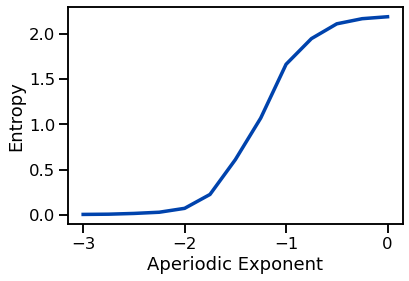

In [20]:
# Plot sample entropy measures across exponent values
plot_lines(exps, sa_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_exp', file_path='info')

In [21]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_ents_comb = run_sims(sim_combined, sim_params_comb, sample_entropy, sa_params,
                        update='update_comb_exp', values=exps, n_instances=n_instances)

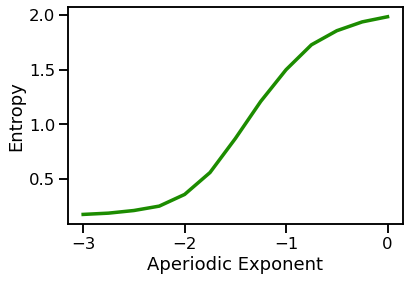

In [22]:
# Plot sample entropy measures across exponent values
plot_lines(exps, sa_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_comb', file_path='info')

#### Plot Aperiodic & Combined Together

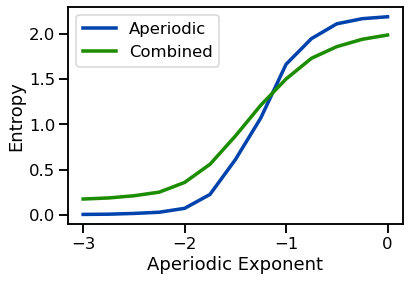

In [23]:
# Plot entropy measures for with & without oscillation together
plot_lines(exps, sa_ents, color=AP_COL, label='Aperiodic')
plot_lines(exps, sa_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_both', file_path='info')

### Permutation Entropy

In [24]:
# Run simulations calculating permutation entropy across exponents
pe_ents = run_sims(sim_powerlaw, sim_params_pow, perm_entropy, pe_params,
                   update='update_exp', values=exps, n_instances=n_instances)

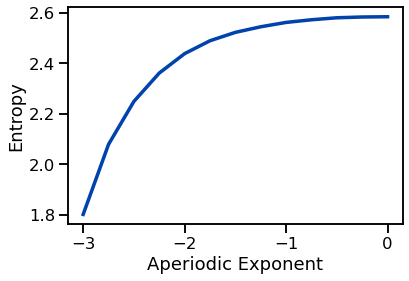

In [25]:
# Plot permutation entropy measures across exponent values
plot_lines(exps, pe_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_exp', file_path='info')

In [26]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_ents_comb = run_sims(sim_combined, sim_params_comb, perm_entropy, pe_params,
                        update='update_comb_exp', values=exps, n_instances=n_instances)

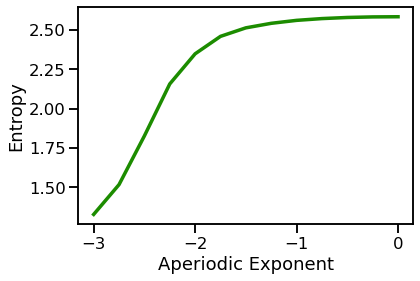

In [27]:
# Plot permutation entropy measures across exponent values, with an oscillation
plot_lines(exps, pe_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_comb', file_path='info')

#### Plot Aperiodic & Combined Together

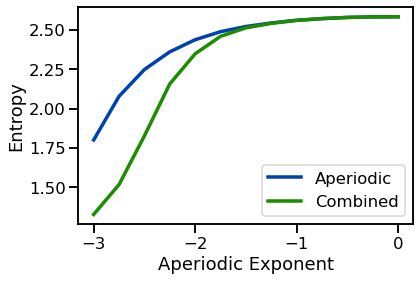

In [28]:
# Plot entropy measures for with & without oscillation together
plot_lines(exps, pe_ents, color=AP_COL, label='Aperiodic')
plot_lines(exps, pe_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_both', file_path='info')

### Approximate Entropy

In [29]:
# Run simulations calculating approximate entropy across exponents
ap_ents = run_sims(sim_powerlaw, sim_params_pow, app_entropy, ap_params, 
                   update='update_exp', values=exps, n_instances=n_instances)

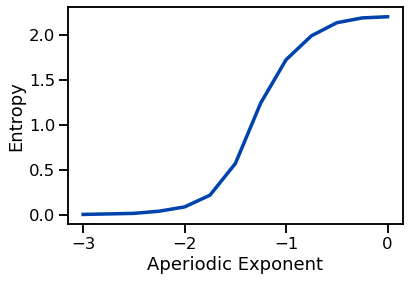

In [30]:
# Plot approximate entropy measures across exponent values
plot_lines(exps, ap_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_exp', file_path='info')

In [31]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_ents_comb = run_sims(sim_combined, sim_params_comb, app_entropy, ap_params, 
                        update='update_comb_exp', values=exps, n_instances=n_instances)

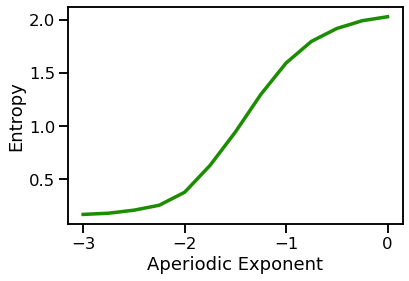

In [32]:
# Plot approximate entropy measures across exponent values, with an oscillation
plot_lines(exps, ap_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_comb', file_path='info')

#### Plot Aperiodic & Combined Together

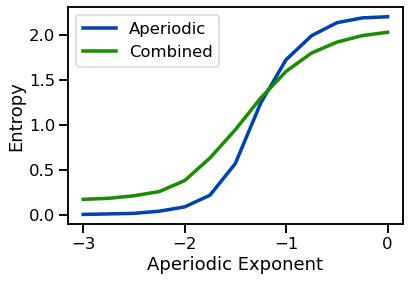

In [33]:
# Plot entropy measures for with & without oscillation together
plot_lines(exps, ap_ents, color=AP_COL, label='Aperiodic')
plot_lines(exps, ap_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

### Spectral Entropy

In [34]:
# Run simulations calculating spectral entropy across exponents
sp_ents = run_sims(sim_powerlaw, sim_params_pow, spectral_entropy, sp_params, 
                   update='update_exp', values=exps, n_instances=n_instances)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


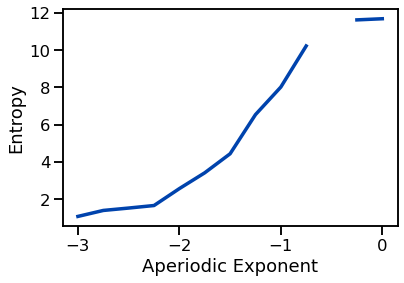

In [35]:
# Plot spectral entropy measures across exponent values
plot_lines(exps, sp_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_exp', file_path='info')

In [36]:
# Run simulations calculating spectral entropy across exponents, with an oscillation
sp_ents_comb = run_sims(sim_combined, sim_params_comb, spectral_entropy, sp_params, 
                        update='update_comb_exp', values=exps, n_instances=n_instances)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


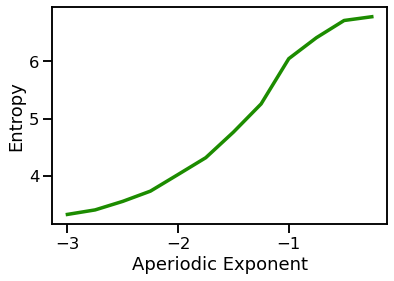

In [37]:
# Plot spectral entropy measures across exponent values, with an oscillation
plot_lines(exps, sp_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_comb', file_path='info')

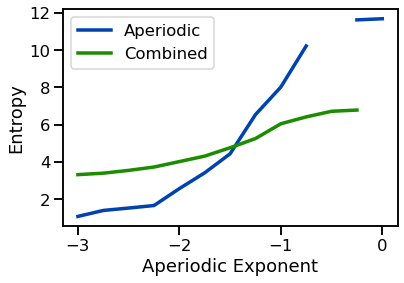

In [38]:
# Plot spectral entropy measures for with & without oscillation together
plot_lines(exps, sp_ents, color=AP_COL, label='Aperiodic')
plot_lines(exps, sp_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

## Entropy Simulations - Periodic Variations

Calculate entropy measures on simulated combined signals, with an oscillation and powerlaw components, across variations of oscillatory parameters. 

#### Sample Entropy

In [39]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq = run_sims(sim_combined, sim_params_comb, sample_entropy, sa_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

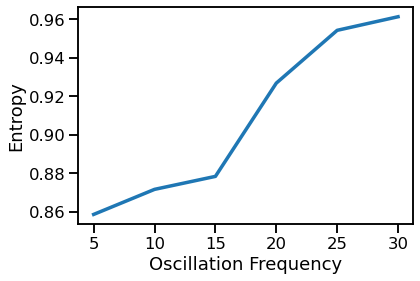

In [40]:
# Plot sample entropy measures across oscillation frequency values
plot_lines(freqs, sa_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_osc_freq', file_path='info')

In [41]:
# Run a set of simulations, calculating sample entropy across oscillation power
sa_sims_pow = run_sims(sim_combined, sim_params_comb, sample_entropy, sa_params,
                       update='update_pow', values=pows, n_instances=n_instances)

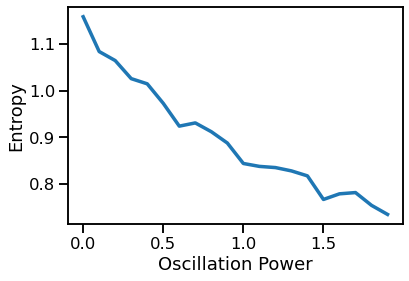

In [42]:
# Plot sample entropy measures across oscillation power values
plot_lines(pows, sa_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_osc_pow', file_path='info')

#### Permutation Entropy

In [43]:
# Run a set of simulations, calculating permutation entropy across oscillation frequency
pe_sims_freq = run_sims(sim_combined, sim_params_comb, perm_entropy, pe_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

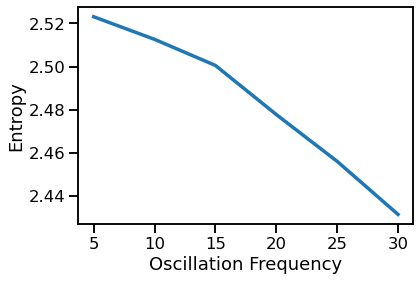

In [44]:
# Plot permutation entropy measures across oscillation frequency values
plot_lines(freqs, pe_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_osc_freq', file_path='info')

In [45]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow = run_sims(sim_combined, sim_params_comb, perm_entropy, pe_params,
                       update='update_pow', values=pows, n_instances=n_instances)

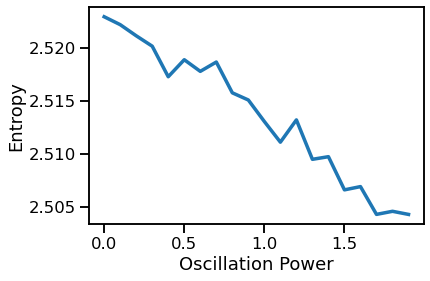

In [46]:
# Plot permutation entropy measures across oscillation power values
plot_lines(pows, pe_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_osc_pow', file_path='info')

#### Approximate Entropy

In [47]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq = run_sims(sim_combined, sim_params_comb, app_entropy, ap_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

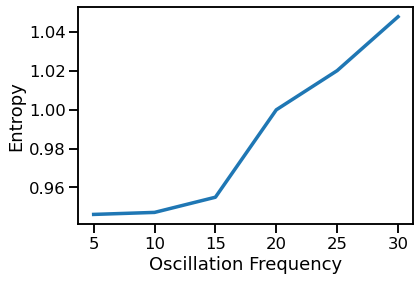

In [48]:
# Plot approximate entropy measures across oscillation frequency values
plot_lines(freqs, ap_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_freq', file_path='info')

In [49]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow = run_sims(sim_combined, sim_params_comb, app_entropy, ap_params,
                       update='update_pow', values=pows, n_instances=n_instances)

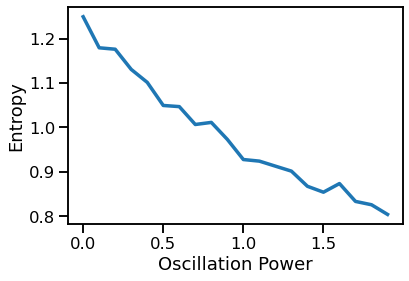

In [50]:
# Plot approximate entropy measures across oscillation power values
plot_lines(pows, ap_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_power', file_path='info')

#### Spectral Entropy

In [51]:
# Run simulations calculating spectral entropy across oscillation frequency
sp_sims_freq = run_sims(sim_combined, sim_params_comb, spectral_entropy, sp_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


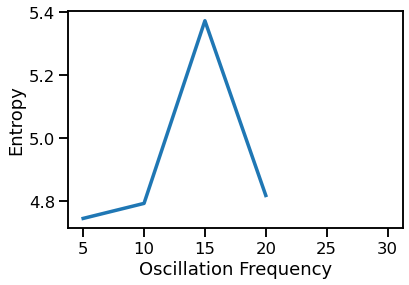

In [52]:
# Plot spectral entropy measures across oscillation frequency values
plot_lines(freqs, sp_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_freq', file_path='info')

In [53]:
# Run simulations calculating spectral entropy across oscillation power
sp_sims_pow = run_sims(sim_combined, sim_params_comb, spectral_entropy, sp_params,
                       update='update_pow', values=pows, n_instances=n_instances)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


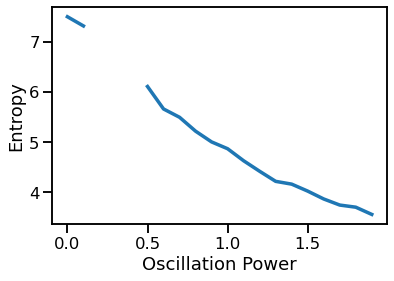

In [54]:
# Plot spectral entropy measures across oscillation power values
plot_lines(pows, sp_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_power', file_path='info')